In [1]:
import pycaret
import pandas as pd

train_path = './Datasets/for_pycaret/SMOTE_train.csv'
f = pd.read_csv(train_path)
f

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X20,X21,X22,X23,X24,day,hour,minute,dayofweek,Y
0,41.830000,124.940000,263.220000,300.570000,10.350000,10.390000,10.320000,90.280000,261.760000,26.720000,...,0.050000,10.350000,7.930000,78.010000,358689.000000,1.000000,0.000000,0.000000,0.000000,3.0
1,41.970000,125.300000,262.120000,300.530000,10.330000,10.400000,10.340000,89.500000,268.510000,26.840000,...,0.000000,9.670000,7.970000,78.080000,339139.000000,1.000000,0.000000,6.000000,0.000000,3.0
2,41.900000,125.000000,261.450000,300.290000,10.350000,10.410000,10.330000,89.740000,263.780000,25.930000,...,0.000000,9.680000,7.980000,79.500000,326082.000000,1.000000,0.000000,12.000000,0.000000,3.0
3,42.330000,125.250000,262.120000,298.940000,10.310000,10.410000,10.330000,89.690000,260.090000,27.340000,...,5.280000,10.920000,7.950000,80.070000,321295.000000,1.000000,0.000000,18.000000,0.000000,3.0
4,42.370000,125.030000,262.940000,301.730000,10.330000,10.400000,10.320000,90.200000,262.260000,41.930000,...,4.600000,11.120000,7.940000,79.960000,339248.000000,1.000000,0.000000,24.000000,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40970,43.346764,125.036363,269.610982,309.209921,10.220581,10.033126,10.593928,182.196646,429.104485,23.927271,...,125.044389,61.693883,7.793236,82.367251,294572.086391,11.098193,2.029065,20.116259,0.676355,5.0
40971,42.170480,125.165508,261.163936,296.487556,10.494880,10.330776,11.129168,183.044165,782.279241,34.456380,...,234.104861,169.421216,7.963900,87.653720,277259.282800,24.014800,16.878000,32.839200,4.473200,5.0
40972,40.287755,124.888282,257.220451,295.181205,10.234978,10.107489,10.948326,177.293830,668.303399,31.501940,...,7.093171,102.902723,7.865022,80.456963,262020.896724,28.000000,20.000000,11.497780,6.000000,5.0
40973,41.759158,124.864466,264.684261,301.104574,10.595216,10.458480,11.121632,158.025924,776.489704,41.102043,...,477.754196,347.139393,7.606417,52.348249,292126.369087,22.836756,12.424024,12.326488,4.027207,5.0


In [2]:
f.Y.value_counts()

4.0    8195
2.0    8195
5.0    8195
3.0    8195
1.0    8195
Name: Y, dtype: int64

In [3]:
from pycaret.classification import *
exp = setup(f, target = 'Y', session_id=123, train_size = 0.9, normalize = True, feature_selection=True,feature_selection_threshold=0.3)


,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(40975, 29)"
5,Missing Values,False
6,Numeric Features,28
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
from sklearn.metrics import log_loss
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function               <function log_loss at 0x0000025528BFC670>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [5]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8829,0.9813,0.8830,0.8824,0.8812,0.8536,0.8542,0.4674
1,0.8693,0.9787,0.8695,0.8674,0.8677,0.8366,0.8370,0.4891
2,0.8845,0.9814,0.8847,0.8834,0.8836,0.8556,0.8558,0.4560
3,0.8886,0.9812,0.8887,0.8876,0.8878,0.8607,0.8608,0.4659
4,0.8894,0.9817,0.8895,0.8885,0.8884,0.8617,0.8620,0.4450
5,0.8850,0.9817,0.8851,0.8845,0.8838,0.8563,0.8567,0.4670
6,0.8858,0.9810,0.8860,0.8849,0.8851,0.8573,0.8575,0.4724
7,0.8866,0.9817,0.8867,0.8858,0.8856,0.8583,0.8586,0.4669
8,0.8899,0.9822,0.8900,0.8887,0.8888,0.8624,0.8626,0.4503
9,0.8826,0.9801,0.8827,0.8815,0.8814,0.8532,0.8535,0.4678


In [6]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8677,0.9775,0.8678,0.8670,0.8659,0.8346,0.8352,0.5208
1,0.8568,0.9737,0.8570,0.8550,0.8552,0.8210,0.8214,0.5430
2,0.8682,0.9759,0.8684,0.8672,0.8673,0.8353,0.8355,0.5303
3,0.8769,0.9780,0.8771,0.8758,0.8756,0.8461,0.8465,0.5177
4,0.8745,0.9776,0.8746,0.8738,0.8735,0.8431,0.8434,0.5174
5,0.8658,0.9772,0.8659,0.8647,0.8643,0.8322,0.8327,0.5236
6,0.8677,0.9761,0.8678,0.8668,0.8668,0.8346,0.8348,0.5396
7,0.8733,0.9783,0.8735,0.8722,0.8723,0.8417,0.8419,0.5345
8,0.8666,0.9787,0.8667,0.8654,0.8651,0.8332,0.8336,0.5310
9,0.8600,0.9748,0.8602,0.8588,0.8589,0.8251,0.8253,0.5252


In [7]:
# lightgbm = create_model('lightgbm')

In [8]:
blend_soft = blend_models(estimator_list = [et, rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8829,0.9813,0.8830,0.8825,0.8812,0.8536,0.8542,0.4847
1,0.8682,0.9782,0.8684,0.8665,0.8666,0.8353,0.8356,0.5064
2,0.8858,0.9806,0.8860,0.8847,0.8849,0.8573,0.8575,0.4835
3,0.8872,0.9812,0.8873,0.8864,0.8862,0.8590,0.8593,0.4749
4,0.8877,0.9813,0.8878,0.8869,0.8868,0.8597,0.8599,0.4718
5,0.8858,0.9814,0.8859,0.8853,0.8846,0.8573,0.8578,0.4854
6,0.8858,0.9804,0.8860,0.8850,0.8850,0.8573,0.8575,0.4849
7,0.8888,0.9816,0.8889,0.8879,0.8878,0.8610,0.8613,0.4917
8,0.8847,0.9822,0.8849,0.8837,0.8836,0.8559,0.8562,0.4775
9,0.8755,0.9793,0.8756,0.8743,0.8742,0.8444,0.8447,0.4868


In [9]:
final = finalize_model(blend_soft)

In [10]:
save_model(final, model_name='best-model')
loaded_bestmodel = load_model('best-model')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


In [11]:
test_path = './Datasets/for_pycaret/test.csv'
t_f = pd.read_csv(test_path)
rf_pred = loaded_bestmodel.predict_proba(t_f)

In [12]:
IDs = list(range(1,rf_pred.shape[0]+1))

ID_arr = np.array(IDs).reshape(-1,1)
combine = np.concatenate((ID_arr, rf_pred), axis=1)
import pandas as pd
df = pd.DataFrame(combine, columns = ['ID','C1','C2','C3','C4','C5'])

df.to_csv('out_blend_soft.csv',index=False)

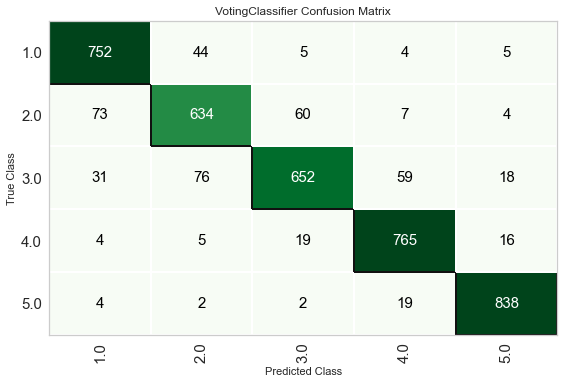

In [14]:
plot_model(blend_soft, 'confusion_matrix')

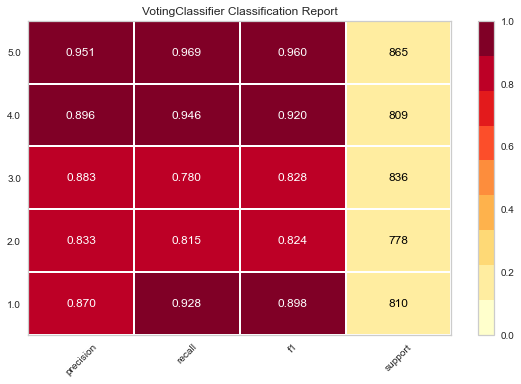

In [15]:
plot_model(blend_soft, 'class_report')

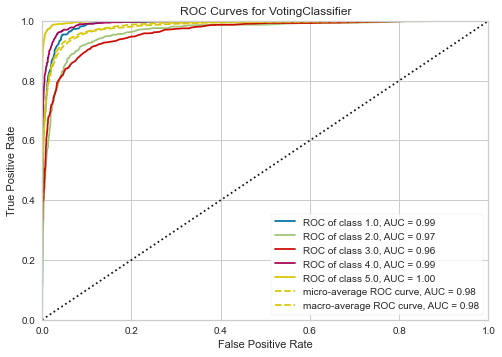

In [16]:
plot_model(blend_soft, 'auc')